### Data Preprocessing

In [18]:
import pandas as pd

# check the info of train data
train_data = pd.read_csv("./data/train.csv")
train_data.info()
train_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# check the info of test data
test_data = pd.read_csv("./data/test.csv")
test_data.head(6)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_X = train_data.iloc[:, 1:].values.astype("float32")
data_y = train_data.iloc[:, 0].values.astype("int32")
X_test = test_data.values.astype('float32')

In [21]:
data_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
data_y

array([1, 0, 1, ..., 7, 6, 9])

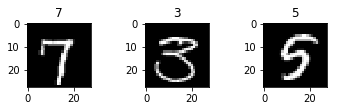

In [23]:
import matplotlib.pyplot as plt

# reshape the X, y data as shape(nums_images, img_rows, img_cols)
data_X = data_X.reshape(data_X.shape[0], 28, 28)

# data visualization 
for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(data_X[i], cmap=plt.get_cmap('gray'))
    plt.title(data_y[i]);

In [24]:
# reshape the X data again, so that they can be used in Keras framworks
data_X = data_X.reshape(data_X.shape[0], 28, 28, 1)
print(data_X.shape)

(42000, 28, 28, 1)


In [25]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [26]:
from keras.utils.np_utils import to_categorical

# change the y data to the one—hot data
data_y = to_categorical(data_y, num_classes=10)

In [27]:
data_y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

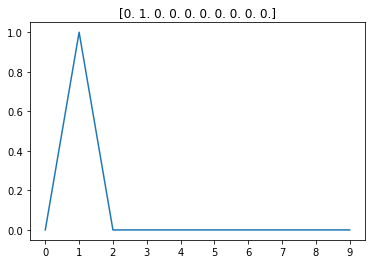

In [28]:
# plot image to check the one-hot data

plt.title(data_y[2])
plt.plot(data_y[2])
plt.xticks(range(10));

In [29]:
from sklearn.model_selection import train_test_split

# split the dataset to train set and val set
X_train, X_val, y_train, y_val = train_test_split(data_X, data_y, test_size=0.2, random_state=0)

### Bulid a Model - Using CNN

In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Lambda
from keras import metrics
from keras.callbacks import ModelCheckpoint


# bulid the CNN model 
model = Sequential()
#model.add(Lambda(lambda x: K.tf.nn.softmax(x)))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [31]:
# compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# fit the model 
history = model.fit(X_train, y_train,
                 epochs=5,
                 batch_size=64,
                 validation_data=(X_val, y_val))

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 22s 661us/step - loss: 10.2666 - acc: 0.3547 - val_loss: 6.3975 - val_acc: 0.5943
Epoch 2/5
33600/33600 [==============================] - 23s 677us/step - loss: 6.1711 - acc: 0.6012 - val_loss: 4.3984 - val_acc: 0.7155
Epoch 3/5
33600/33600 [==============================] - 22s 645us/step - loss: 2.6750 - acc: 0.7714 - val_loss: 0.4016 - val_acc: 0.9050
Epoch 4/5
33600/33600 [==============================] - 22s 650us/step - loss: 0.7243 - acc: 0.8222 - val_loss: 0.2666 - val_acc: 0.9331
Epoch 5/5
33600/33600 [==============================] - 22s 651us/step - loss: 0.5389 - acc: 0.8586 - val_loss: 0.2155 - val_acc: 0.9423


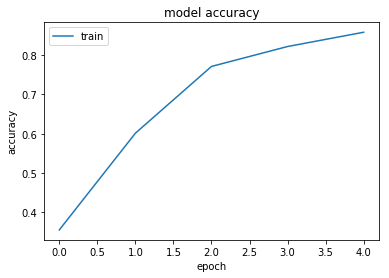

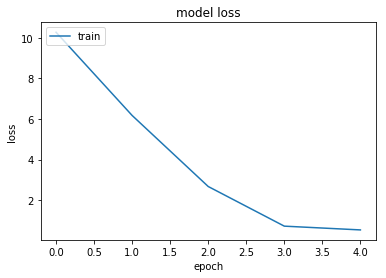

In [33]:
# plot the accuracy of train
plt.plot(history.history['acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train'], loc='upper left')  
plt.show()  

# plot the loss of train 
plt.plot(history.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train'], loc='upper left')  
plt.show() 

### Test the model 

In [34]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submission.csv", index=False, header=True)